#**Module 0**

In [ ]:
!pip install -q langchain_google_genai langchain_core

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
from google.colab import userdata
Gemini_API_KEY=userdata.get('Gemeini_API_KEY')
llm=ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",
    api_key=Gemini_API_KEY,
    temperature=0
)

In [ ]:
llm.invoke("What is LLM")

In [ ]:
from langchain_core.messages import HumanMessage, AIMessage
messages=[
    HumanMessage(role="User", content='hello'),
    AIMessage(role="Agentic AI Assistant", content='Hi! How can I help you today? \n'),
    HumanMessage(role="User", content="What is LangChain?"),
    AIMessage(role='Assiatant', content='LangChain is a framework for developing applications powered by large language models (LLMs)'),
    HumanMessage(content="How can I learn", name="user")



]

messagess = [
    HumanMessage(content="Hi", name="Human Student"),
    AIMessage(content='Hi! How can I help you today? \n', name="AI Assistant"),
    # HumanMessage(content="What is LangChain?", name="Human Student"),
    AIMessage(content='LangChain is a framework for developing applications powered by language models.', name="AI Assistant"),
    HumanMessage(content="How can I learn", name="Human Student"),
    ]

#invoke the llm with list of message
llm.invoke(messages)

In [ ]:
# !pip install langchain_Community tavily-python
import os
from google.colab import userdata
# Tavily_API_KEY=userdata.get('Tavily_API_KEY')
os.environ['TAVILY_API_KEY']=userdata.get('Tavily_API_KEY')

from langchain_community.tools.tavily_search import TavilySearchResults

tavily_search = TavilySearchResults(max_results=4)
# tavily_search.run("Who won 2024 US presidential ellection?")
from langchain.utilities.tavily_search import TavilySearchAPIWrapper
search = TavilySearchAPIWrapper()
tavily_tool = TavilySearchResults(api_wrapper=search)
# tavily_tool.run("What is LangChain?")

tavily_tool.run("Who won 2024 US presidential ellection?")


#**Module 1**

##Simple Graph creation

In [ ]:
# instal required libaries
!pip install -q -U langgraph

In [ ]:
# import dic
from typing_extensions import TypedDict

# build a schema for state
class AlphaCoding(TypedDict):
  prompt:str

In [ ]:
# check the simple build schema

learnCpp:AlphaCoding=AlphaCoding(prompt="Learn C++")
# learnCpp["prompt"]="i am"
# learnCpp['prompt']+' and Python now'


'Learn C++ and Python now'

In [ ]:
def node1(state:AlphaCoding) -> AlphaCoding:
  print("----------Node1----------" ,state)
  state['prompt']='I am learning  C++ '
  return {'prompt': state[ 'prompt']}

def node2(state:AlphaCoding)-> AlphaCoding:
  print("--------Node2------------", state)
  return {'prompt': state['prompt']+'and Python as well'}


In [ ]:
result=node1(learnCpp)
result['prompt']

In [ ]:
from langgraph.graph import StateGraph, START, END
from langgraph.graph.state import CompiledStateGraph

In [ ]:
build:StateGraph= StateGraph(state_schema=AlphaCoding)
type(build)

In [ ]:

build.add_node('node1', node1)
build.add_node('node2', node2)

In [ ]:
build.add_edge('node1','node2')
build.add_edge(START,'node1')
build.add_edge('node2',END)

In [ ]:
graph:CompiledStateGraph=build.compile()
print(graph.get_graph())

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=<class 'langchain_core.utils.pydantic.LangGraphInput'>, metadata=None), 'node1': Node(id='node1', name='node1', data=node1(tags=None, recurse=True, func_accepts_config=False, func_accepts={'writer': False, 'store': False}), metadata=None), 'node2': Node(id='node2', name='node2', data=node2(tags=None, recurse=True, func_accepts_config=False, func_accepts={'writer': False, 'store': False}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=<class 'langchain_core.utils.pydantic.LangGraphOutput'>, metadata=None)}, edges=[Edge(source='__start__', target='node1', data=None, conditional=False), Edge(source='node1', target='node2', data=None, conditional=False), Edge(source='node2', target='__end__', data=None, conditional=False)])


In [ ]:
from IPython.display import Image, display


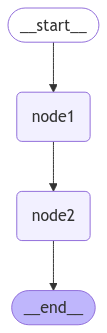

In [ ]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
graph.invoke({'prompt':'Hi'})

----------Node1---------- {'prompt': 'Hi'}
--------Node2------------ {'prompt': 'I am learning  C++ '}


{'prompt': 'I am learning  C++ and Python as well'}

##In Nodes Use LLM == GoogleChatModel in Langchain

In [ ]:
!pip install -q -U langchain langchain_google_genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.5/409.5 kB 26.6 MB/s eta 0:00:00


In [ ]:
from google.colab import userdata
Gemeini_API_KEY=userdata.get('Gemeini_API_KEY')

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm:ChatGoogleGenerativeAI=ChatGoogleGenerativeAI(
    model='gemini-1.5-flash',
    api_key=Gemeini_API_KEY,
)

In [ ]:
from langchain_core.messages import AIMessage
ai_message:AIMessage= llm.invoke("Hi")
ai_message.content
type(ai_message.content)

str

In [ ]:
from typing_extensions import TypedDict

class FirstAgent(TypedDict):
  userInput:str
  output:str

def node_1(state:FirstAgent)->FirstAgent:
  print("----------Node1----------" ,state)
  userInput=state['userInput']
  ai_message=llm.invoke(userInput)
  return {'output':ai_message.content}

def node_2(state:FirstAgent)->FirstAgent:
  print("--------Node2------------", state)
  userInput=state['userInput']
  ai_message=llm.invoke(userInput)
  return {'output':ai_message.content}


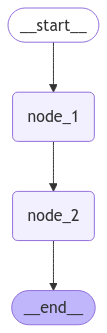

In [ ]:
builder:StateGraph=StateGraph(state_schema=FirstAgent)

builder.add_node('node_1', node_1)
builder.add_node('node_2', node_2)

builder.add_edge(START,'node_1')
builder.add_edge('node_1','node_2')
builder.add_edge('node_2',END)

graph:CompiledStateGraph= builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
# graph.invoke({'userInput':'Hi i am student of CS'})
result= node_1({'userInput':'Hi i am student of CS'})



----------Node1---------- {'userInput': 'Hi i am student of CS'}


{'output': "That's great!  What can I help you with today?  Are you working on a specific project, have a question about a concept, or just looking for some general advice?  Knowing what you're working on will help me give you the best assistance.\n"}

In [ ]:
result= node_1({'userInput':'Yes i am learning langGraph'})
result

----------Node1---------- {'userInput': 'Yes i am learning langGraph'}


{'output': "That's great! LangGraph is a powerful tool, but it can also be quite complex.  To help me assist you better, could you tell me what specifically you'd like help with?  For example, are you:\n\n* **Just starting out and need help understanding the basics?**  (e.g., What is LangGraph? How do I install it?)\n* **Working on a specific project and encountering a problem?** (e.g.,  I'm trying to build a graph for X, but I'm getting this error...)\n* **Trying to understand a particular concept?** (e.g.,  Can you explain the difference between node types A and B?)\n* **Looking for resources to learn more?** (e.g., Do you know of any good tutorials or documentation?)\n\n\nThe more detail you can provide, the better I can help you.\n"}

In [ ]:
result= node_1({'userInput':'Motivate me to learn langraph'})
result

----------Node1---------- {'userInput': 'Motivate me to learn langraph'}


{'output': "Let's talk about why learning LangChain might be the *perfect* next step for you. Forget dry technical jargon – let's focus on the exciting possibilities:\n\n**Imagine this:**\n\n* **You're building a revolutionary chatbot:**  Not just a simple Q&A bot, but one that can access and process information from your entire personal document library, summarizing complex reports in seconds, or even crafting creative stories based on your own data. LangChain gives you the tools to make this a reality.\n\n* **You're streamlining your workflow:**  Tired of manually searching through countless documents? LangChain can help you build a system that instantly finds the relevant information you need, saving you hours of tedious work. Imagine a personal research assistant, always at your fingertips.\n\n* **You're at the forefront of AI innovation:** LangChain is a leading framework in a rapidly evolving field. Mastering it positions you as a highly sought-after developer with cutting-edge s

In [ ]:
result= node_1({'userInput':'Who am i? do you remember me'})
result

----------Node1---------- {'userInput': 'Who am i? do you remember me'}


{'output': "As a large language model, I have no memory of past conversations.  Each interaction with me starts fresh.  To help me understand who you are, you'll need to tell me something about yourself!\n"}

In [ ]:
result= node_1({'userInput':'Hi i am student of CS'})
result

----------Node1---------- {'userInput': 'Hi i am student of CS'}


{'output': "That's great!  What can I help you with today?  Are you working on a specific project, have a question about a concept, or just looking for general advice?  Let me know how I can assist you.\n"}

In [ ]:
result= node_2({'userInput':'Yes i am learning langGraph'})
result

--------Node2------------ {'userInput': 'Yes i am learning langGraph'}


{'output': "That's great!  LangGraph is a powerful tool. To help me assist you better, could you tell me what specifically you'd like to know or what you're working on with LangGraph?  For example, are you:\n\n* **Trying to understand the core concepts?** (e.g., graph representations of language, node types, edge types)\n* **Working on a specific project?** (e.g., building a knowledge graph, performing a specific analysis)\n* **Encountering a particular problem or error?** (Please provide details!)\n* **Looking for resources or tutorials?**\n\nThe more information you provide, the better I can help you learn and use LangGraph effectively.\n"}

In [ ]:
result= node_2({'userInput':'Motivate me to learn langraph'})
result

--------Node2------------ {'userInput': 'Motivate me to learn langraph'}


{'output': "Let's talk about why you should learn LangChain.  Forget the dry, technical jargon for a moment – let's focus on the *impact* and *excitement* of what you can build.\n\n**Imagine this:**\n\n* **You're building a revolutionary chatbot:** Not just a simple Q&A bot, but one that can access and process information from your own private documents, your company's internal knowledge base, or even the entire public web. Imagine the possibilities for customer service, internal support, or even personalized education. LangChain makes this *accessible*.\n\n* **You're crafting a powerful summarization tool:**  Need to sift through hundreds of pages of research papers, legal documents, or news articles? LangChain can help you build a tool that automatically extracts the key information, saving you hours (or even days) of tedious work.\n\n* **You're creating a creative writing assistant:**  Stuck on writer's block? LangChain can help you brainstorm ideas, generate different writing style

In [ ]:
result= node_1({'userInput':'Who am i? do you remember me'})
result

----------Node1---------- {'userInput': 'Who am i? do you remember me'}


{'output': "As a large language model, I have no memory of past conversations.  Each interaction with me starts fresh.  To help me understand who you are, you'll need to tell me something about yourself!\n"}

In [ ]:
result= node_2({'userInput':'Who am i? do you remember me'})
result

--------Node2------------ {'userInput': 'Who am i? do you remember me'}


{'output': 'As a large language model, I have no memory of past conversations.  Each interaction with me starts fresh.  To help me understand who you are, please tell me something about yourself!\n'}

##Conditional Edge

In [ ]:
!pip install -q -U langgraph langchain langchain_google_genai


In [ ]:
from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI
Gemeini_API_KEY=userdata.get('Gemeini_API_KEY')
llm:ChatGoogleGenerativeAI=ChatGoogleGenerativeAI(
    model='gemini-1.5-flash',
    Gemeini_API_KEY=Gemeini_API_KEY,
)

In [ ]:
from typing_extensions import TypedDict

class secondAgent(TypedDict):
  userInput:str
  # output:str

def node_1(state:secondAgent)->secondAgent:
  print("----------Node1----------" ,state)
  userInput=state['userInput']
  # return {'output':userInput }
  return {'userInput':userInput + 'I am ' }

def node_2(state:secondAgent)->secondAgent:
  print("--------Node2------------", state)
  userInput=state['userInput']
  return {'userInput':userInput + 'happy' }

def node_3(state:secondAgent)->secondAgent:
  print("--------Node3------------", state)

  return {'userInput':state['userInput'] + 'sad' }

In [ ]:
import random
from typing import Literal
def decision_node(state:secondAgent)-> Literal['node_2', 'node_3']:
  check:float= random.random()

  if(check>0.5):
    return 'node_2'
  else:
    return 'node_3'



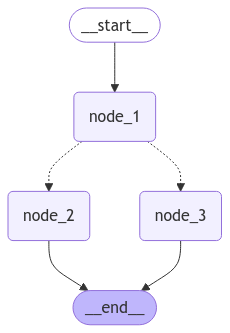

In [ ]:
from IPython.display import Image, display
from langgraph.graph.state import CompiledStateGraph
from langgraph.graph import StateGraph, START, END

builder:StateGraph=StateGraph(state_schema=secondAgent)

builder.add_node('node_1',node_1)
builder.add_node('node_2',node_2)
builder.add_node('node_3',node_3)

builder.add_edge(START, 'node_1')
builder.add_conditional_edges('node_1', decision_node)
builder.add_edge('node_2', END)
builder.add_edge('node_3', END)

graph:CompiledStateGraph= builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
graph.invoke({'userInput':'Hello Here is  Ali '})

----------Node1---------- {'userInput': 'Hello Here is  Ali '}
--------Node3------------ {'userInput': 'Hello Here is  Ali I am '}


{'userInput': 'Hello Here is  Ali I am sad'}

##**LLM with Tool Calling, Chains & Reducers**

In [ ]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage
messages=[AIMessage(content='Your an Tourist Assistant', name='model')]
messages.append(HumanMessage( content='i want to explore the northern Areas of Pakistan', name='user'))
messages.append(AIMessage(content='You can vist GB', name='model'))

for m in messages:
  m.pretty_print()

In [ ]:
!pip install -q -U langchain_google_genai langchain_core

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.5/409.5 kB 9.9 MB/s eta 0:00:00


In [ ]:
from google.colab import userdata
Gemeini_API_KEY=userdata.get('Gemeini_API_KEY')

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import SystemMessage, HumanMessage
llm:ChatGoogleGenerativeAI=ChatGoogleGenerativeAI(
    model='gemini-1.5-flash',
    api_key=Gemeini_API_KEY,

)

system_human_message = [
                SystemMessage(content="You are a helpful assistant! Your name is Bob."),
                HumanMessage(content="What is your name?")
            ]
result = llm.invoke(system_human_message)
print(result)

content='My name is Bob.\n' additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []} id='run-c2dd1e2b-8953-404e-ab9d-864a17edced6-0' usage_metadata={'input_tokens': 17, 'output_tokens': 6, 'total_tokens': 23, 'input_token_details': {'cache_read': 0}}


###With Tool function

In [ ]:
!pip install langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.1/125.1 kB 3.8 MB/s eta 0:00:00


In [ ]:
print(llm)

model='models/gemini-1.5-flash' google_api_key=SecretStr('**********') client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x7ee0dffbda20> default_metadata=()


In [ ]:
# function tool
def deposit_money(name:str, amount:int, account_id:int)->dict:

  """Deposit Money into bank.
  Arg:
  name: account holder name :str
  ammount: amount to deposit :int
  account_id: account id :int
   return:
   dict
   """
  return{'status': f"{amount} has been deposited to {name}'s account"}

In [ ]:
llmwithFunction= llm.bind_tools(tools=[deposit_money])

In [ ]:
llmwithFunction

RunnableBinding(bound=ChatGoogleGenerativeAI(model='models/gemini-1.5-flash', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x7ee0dffbda20>, default_metadata=()), kwargs={'tools': [{'type': 'function', 'function': {'name': 'deposit_money', 'description': 'Deposit Money into bank.\nArg:\nname: account holder name :str\nammount: amount to deposit :int\naccount_id: account id :int\n return:\n dict\n', 'parameters': {'properties': {'name': {'type': 'string'}, 'amount': {'type': 'integer'}, 'account_id': {'type': 'integer'}}, 'required': ['name', 'amount', 'account_id'], 'type': 'object'}}}]}, config={}, config_factories=[])

In [ ]:
llmwithFunction.invoke('hi')

AIMessage(content='Hello! How can I help you today?\n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-62cdbe19-7cf7-42ce-8a3b-bccf43463609-0', usage_metadata={'input_tokens': 99, 'output_tokens': 10, 'total_tokens': 109, 'input_token_details': {'cache_read': 0}})

In [ ]:
llmwithFunction.invoke('how can i deposit money')

AIMessage(content="To deposit money, you'll need to provide your account ID, the amount you wish to deposit, and your name.  The system will then process the transaction.  What are your account ID, the amount, and your name?\n", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-739737df-ac02-4dbd-8b9f-5beefd641d7a-0', usage_metadata={'input_tokens': 103, 'output_tokens': 49, 'total_tokens': 152, 'input_token_details': {'cache_read': 0}})

In [ ]:
llm.invoke('how can i deposit money')

AIMessage(content="The method for depositing money depends entirely on *where* you want to deposit it.  To help me give you a useful answer, please tell me:\n\n* **Where are you depositing the money?**  (e.g., a bank account, a brokerage account, a prepaid card, a mobile payment app like PayPal or Venmo, a specific company's account, etc.)\n* **How are you depositing the money?** (e.g., cash, check, electronic transfer from another account, debit card, credit card)\n\nOnce I have this information, I can provide specific instructions.\n", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-28dec05b-6479-463d-8bf8-7d773e25e2e3-0', usage_metadata={'input_tokens': 6, 'output_tokens': 125, 'total_tokens': 131, 'input_token_details': {'cache_read': 0}})

In [ ]:
llmwithFunction.invoke(" deposit $2000 into Awais's account and account id is 123")

AIMessage(content='', additional_kwargs={'function_call': {'name': 'deposit_money', 'arguments': '{"account_id": 123.0, "amount": 2000.0, "name": "Awais"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-2ac112d5-4109-4283-9a72-40b0a1508309-0', tool_calls=[{'name': 'deposit_money', 'args': {'account_id': 123.0, 'amount': 2000.0, 'name': 'Awais'}, 'id': '1bf96b67-baf9-4d2b-a184-f883eddfcf6e', 'type': 'tool_call'}], usage_metadata={'input_tokens': 119, 'output_tokens': 11, 'total_tokens': 130, 'input_token_details': {'cache_read': 0}})

In [ ]:
## Graph
from typing_extensions import TypedDict

class llmwithToolState(TypedDict):
  messages:list

def call_llm(state:llmwithToolState)->llmwithToolState:
  message=state['messages']
  response=llmwithFunction.invoke(message)
  return {'messages':[response]}

In [ ]:
call_llm({'messages':[" deposit $2000 into Awais's account and account id is 123"]})

{'messages': [AIMessage(content='', additional_kwargs={'function_call': {'name': 'deposit_money', 'arguments': '{"account_id": 123.0, "amount": 2000.0, "name": "Awais"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-14cd80fb-c1ad-41de-b215-e2a1435af6e3-0', tool_calls=[{'name': 'deposit_money', 'args': {'account_id': 123.0, 'amount': 2000.0, 'name': 'Awais'}, 'id': 'b96282de-402d-47e7-915c-7482d7dd3e57', 'type': 'tool_call'}], usage_metadata={'input_tokens': 119, 'output_tokens': 11, 'total_tokens': 130, 'input_token_details': {'cache_read': 0}})]}

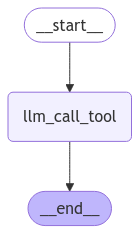

In [ ]:
from langgraph.graph import StateGraph, START, END
from langgraph.graph.state import CompiledStateGraph
from IPython.display import Image, display
builder:StateGraph=StateGraph(state_schema=llmwithToolState)

builder.add_node('llm_call_tool', call_llm)

builder.add_edge(START,'llm_call_tool')
builder.add_edge('llm_call_tool',END)

graph:CompiledStateGraph= builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
messages=graph.invoke({'messages':[HumanMessage(content=" deposit $2000 into Awais's account and account id 123 ")]})
# graph.invoke({'messages':[HumanMessage(content="account id 123 ")]})
# graph.invoke({'messages':[HumanMessage(content="Is amount deposit")]})
for m in messages['messages']:
  m.pretty_print()
  # print(m)

================================== Ai Message ==================================
Tool Calls:
  deposit_money (39a49dd9-73bb-4b83-a80f-ef0932c3351c)
 Call ID: 39a49dd9-73bb-4b83-a80f-ef0932c3351c
  Args:
    account_id: 123.0
    amount: 2000.0
    name: Awais


###chains_reducers

In [ ]:
def multiply(a: int, b: int) -> int:
    """Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b

llmwithFunction=llmwithFunction.bind_tools([multiply,deposit_money])



In [ ]:
llmwithFunction

RunnableBinding(bound=ChatGoogleGenerativeAI(model='models/gemini-1.5-flash', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x7b7280b60460>, default_metadata=()), kwargs={'tools': [{'type': 'function', 'function': {'name': 'multiply', 'description': 'Multiply a and b.', 'parameters': {'properties': {'a': {'description': 'first int', 'type': 'integer'}, 'b': {'description': 'second int', 'type': 'integer'}}, 'required': ['a', 'b'], 'type': 'object'}}}, {'type': 'function', 'function': {'name': 'deposit_money', 'description': 'Deposit Money into bank.\nArg:\nname: account holder name :str\nammount: amount to deposit :int\naccount_id: account id :int\n return:\n dict\n', 'parameters': {'properties': {'name': {'type': 'string'}, 'amount': {'type': 'integer'}, 'account_id': {'type': 'integer'}}, 'required': ['name', 'amount', 'account_id'], 'type': 'object'}}}]}, config={}, config_fact

In [ ]:
function_call=llmwithFunction.invoke([HumanMessage(content=f"What is 2 multiplied by 3", name="Lance")])
call_llm({'messages':[" deposit $2000 into Awais's account and account id is 123"]})

{'messages': [AIMessage(content='', additional_kwargs={'function_call': {'name': 'deposit_money', 'arguments': '{"account_id": 123.0, "amount": 2000.0, "name": "Awais"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-afcd60d3-b60b-496d-9bbc-518d1ab231ba-0', tool_calls=[{'name': 'deposit_money', 'args': {'account_id': 123.0, 'amount': 2000.0, 'name': 'Awais'}, 'id': '0bb79038-efa9-4951-b015-5d27dd9678da', 'type': 'tool_call'}], usage_metadata={'input_tokens': 167, 'output_tokens': 11, 'total_tokens': 178, 'input_token_details': {'cache_read': 0}})]}

In [ ]:
function_call.additional_kwargs['function_call']


{'name': 'multiply', 'arguments': '{"a": 2.0, "b": 3.0}'}

In [ ]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
class MessageState(TypedDict):
  messages:list[AnyMessage]

In [ ]:
from typing import Annotated
from langgraph.graph.message import add_messages
class MessageState(TypedDict):
  messages: Annotated [list[AnyMessage], add_messages]

# def add_messages(messages: list[AnyMessage], new_messages: list[AnyMessage]) -> list[AnyMessage]:
#     """Add new messages to existing messages."""
#     return messages + new_messages

In [ ]:
add_messages(['first '], ['second'])

['first ', 'second']

In [ ]:
from langgraph.graph import MessagesState

class Messagestate(MessagesState):
  pass

# def add_messages(messages: list[AnyMessage], new_messages: list[AnyMessage]) -> list[AnyMessage]:
#     """Add new messages to existing messages."""
#     return messages + new_messages

In [ ]:
initial_messages = [AIMessage(content="Hello! How can I assist you?", name="Model"),
                    HumanMessage(content="I'm looking for information on marine biology.", name="Lance")
                   ]

# New message to add
new_message = AIMessage(content="Sure, I can help with that. What specifically are you interested in?", name="Model")

# Test
add_messages(initial_messages , new_message)

[AIMessage(content='Hello! How can I assist you?', additional_kwargs={}, response_metadata={}, name='Model', id='6c1a65d2-7b83-481d-ad76-f47eefcb0a08'),
 HumanMessage(content="I'm looking for information on marine biology.", additional_kwargs={}, response_metadata={}, name='Lance', id='30e41605-8363-46e3-9331-758703e1b50a'),
 AIMessage(content='Sure, I can help with that. What specifically are you interested in?', additional_kwargs={}, response_metadata={}, name='Model', id='16968ac5-36e1-4a5f-8899-3a458fcf0c51')]

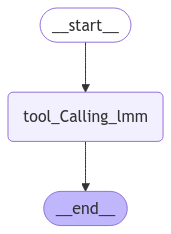

In [ ]:
#graph

def tool_Calling_lmm(state:Messagestate)->Messagestate:
  updated_messages = llmwithFunction.invoke(state["messages"])
  return {"messages": updated_messages}

builder:StateGraph=StateGraph(state_schema=Messagestate)

builder.add_node('tool_Calling_lmm', tool_Calling_lmm)

builder.add_edge(START,'tool_Calling_lmm')
builder.add_edge('tool_Calling_lmm',END)

graph:CompiledStateGraph= builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))


In [ ]:
# messages+=graph.invoke({'messages':'I am looking for information on  Ai agent.'})
# messages+=(graph.invoke({'messages':'How to learn Ai agent.'}))

messages+=graph.invoke({'messages':'I want t become an   Ai agent developer .'})
messages+=(graph.invoke({'messages':'Motivate me to learn Ai agent.'}))
messages
for m in messages['messages']:
  print(m)

================================ Human Message =================================

Motivate me to learn Ai agent.
================================== Ai Message ==================================

Embarking on the journey of learning about AI agents opens doors to a world of fascinating possibilities.  Imagine creating intelligent systems that can learn, adapt, and solve complex problems autonomously. This isn't just theoretical; AI agents are already transforming various industries, from revolutionizing customer service with chatbots to optimizing logistics and supply chains.  The skills you gain will be highly sought after, positioning you at the forefront of technological innovation.  Moreover, the creative problem-solving involved in designing and building AI agents is incredibly rewarding, offering a unique blend of intellectual challenge and tangible results.  You'll be contributing to a field that's shaping the future, and that's a pretty powerful motivator in itself.


In [ ]:
messages=graph.invoke({'messages':HumanMessage(content='what is the product of 2 and 4')})
# messages=graph.invoke({'messages':[" deposit $2000 into Awais's account and account id is 123"]})
for m in messages['messages']:
  m.pretty_print()

================================ Human Message =================================

what is the product of 2 and 4
================================== Ai Message ==================================
Tool Calls:
  multiply (61e0a991-9ab7-481b-8758-8d5466719c15)
 Call ID: 61e0a991-9ab7-481b-8758-8d5466719c15
  Args:
    a: 2.0
    b: 4.0


In [ ]:
# function_call.additional_kwargs['function_call']
# messages


{'messages': [HumanMessage(content=" deposit $2000 into Awais's account and account id is 123", additional_kwargs={}, response_metadata={}, id='2b130d0c-8a57-48f7-896d-6226d9bc40f6'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'deposit_money', 'arguments': '{"account_id": 123.0, "amount": 2000.0, "name": "Awais"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-fe540318-c6dd-4303-8b19-88806bf7efc0-0', tool_calls=[{'name': 'deposit_money', 'args': {'account_id': 123.0, 'amount': 2000.0, 'name': 'Awais'}, 'id': '464afe8b-f080-4753-871d-44df92d0e1f8', 'type': 'tool_call'}], usage_metadata={'input_tokens': 167, 'output_tokens': 11, 'total_tokens': 178, 'input_token_details': {'cache_read': 0}})]}

In [ ]:
agrs=messages['messages'][1].additional_kwargs['function_call']
agrs

{'name': 'deposit_money',
 'arguments': '{"account_id": 123.0, "amount": 2000.0, "name": "Awais"}'}

### Issues till now
```
-> why it llm not store the previous state when call the next state like below :

   messages+=graph.invoke({'messages':'I am looking for information on  Ai agent.'})
   
   messages+=(graph.invoke({'messages':'How to learn Ai agent.'}))

->when we add a new function to llm why it overwrite the previous one

```

